# Yulu Business Hypothesis Testing

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### Objectives

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands?

### Data description

Column Profiling:

datetime: datetime

season: 
        1: spring 
        2: summer
        3: fall 
        4: winter

holiday: whether day is a holiday or not
        1: yes
        0: no

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
        1: weekday (not including holiday)
        0: weekend

weather: 
        1: Clear, Few clouds, partly cloudy 
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: real feel temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, anderson, normaltest

In [2]:
df_yulu = pd.read_csv('yulu_bike_sharing_dataset.csv')
df_yulu.head(n=10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [3]:
df_yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
df_yulu.shape

(10886, 12)

In [5]:
df_yulu.describe()
#df_yulu[df_yulu.season == 1].sum()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
df_yulu.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
df_yulu.groupby(['weather','season'])['season'].count()

weather  season
1        1         1759
         2         1801
         3         1930
         4         1702
2        1          715
         2          708
         3          604
         4          807
3        1          211
         2          224
         3          199
         4          225
4        1            1
Name: season, dtype: int64

In [9]:
df_yulu.groupby(['weather'])['season'].count()

weather
1    7192
2    2834
3     859
4       1
Name: season, dtype: int64

The weather was during the two year period mostly clear, clear with few clouds and possible mist in the early hours during nights 92% of the time.

In [10]:
df_yulu.groupby(['workingday'])['casual', 'registered'].sum()

<ipython-input-10-d8492f448a73>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_yulu.groupby(['workingday'])['casual', 'registered'].sum()


,casual,registered
workingday,,
0,206037,448835
1,186098,1244506


In [11]:
df_yulu.groupby(['holiday'])['casual', 'registered'].sum()

<ipython-input-11-01ad24ccd4af>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_yulu.groupby(['holiday'])['casual', 'registered'].sum()


,casual,registered
holiday,,
0,376964,1650704
1,15171,42637


In [12]:
pd.crosstab(index = df_yulu['holiday'], columns = df_yulu['weather'])

weather,1,2,3,4
holiday,,,,
0,6988,2742,844,1
1,204,92,15,0


In [16]:
season_temp_humidity = df_yulu[['datetime', 'temp', 'season', 'humidity', 'windspeed']]
season_temp_humidity.groupby('season').mean()

,temp,humidity,windspeed
season,,,
1,12.530491,56.297841,14.636978
2,22.823483,60.852909,13.405607
3,28.789111,64.123674,11.508862
4,16.649239,66.173738,11.678147


<AxesSubplot:xlabel='season'>

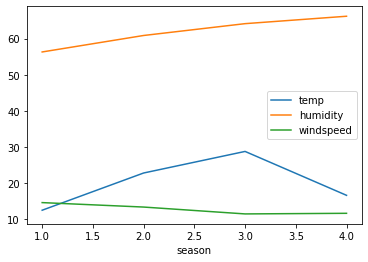

In [17]:
season_temp_humidity.groupby('season').mean().plot(kind = 'line')

The data has hourly observations that can be collased into daily entries. By doing that we use the mean temperature, humidity and windspeed for that day and summing up all the users for that day.

In [18]:
df_yulu['datetime'] = pd.to_datetime(df_yulu['datetime'])
df_yulu_daily = df_yulu.resample('24h', on = 'datetime').agg(dict(season = 'last',
                                                                  holiday = 'last',
                                                                  workingday = 'last',
                                                                  weather = 'last',
                                                                  temp = 'mean',
                                                                  atemp = 'mean',
                                                                  humidity = 'mean',
                                                                  windspeed = 'mean',
                                                                  casual = 'sum',
                                                                  registered = 'sum',
                                                                  count = 'sum'))

The new dataset now contains daily observations only.

In [19]:
df_yulu_daily.head(n=10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,2.0,14.110833,18.181250,80.583333,10.749871,331,654,985
2011-01-02,1.0,0.0,0.0,1.0,14.902609,17.686957,69.608696,16.652122,131,670,801
2011-01-03,1.0,0.0,1.0,1.0,8.050909,9.470227,43.727273,16.636709,120,1229,1349
2011-01-04,1.0,0.0,1.0,1.0,8.200000,10.606087,59.043478,10.739809,108,1454,1562
2011-01-05,1.0,0.0,1.0,1.0,9.305217,11.463478,43.695652,12.522300,82,1518,1600
2011-01-06,1.0,0.0,1.0,2.0,8.378261,11.660435,51.826087,6.000870,88,1518,1606
2011-01-07,1.0,0.0,1.0,2.0,8.057391,10.441957,49.869565,11.304648,148,1362,1510
2011-01-08,1.0,0.0,0.0,1.0,6.765000,8.112708,53.583333,17.875879,68,891,959
2011-01-09,1.0,0.0,0.0,1.0,5.671667,5.808750,43.416667,24.250650,54,768,822


There has been created entry for dates when there were no observations hence there is no available data that we need to remove from our new dataset.

In [20]:
df_yulu_daily.isna().sum()

season        263
holiday       263
workingday    263
weather       263
temp          263
atemp         263
humidity      263
windspeed     263
casual          0
registered      0
count           0
dtype: int64

In [21]:
df_yulu_daily = df_yulu_daily.replace('NaN', pd.NA)
df_yulu_daily.dropna(axis=0, how='any', thresh=None, subset=None, inplace = True)
df_yulu_daily.shape

(456, 11)

Pairwise representation of the variables. 

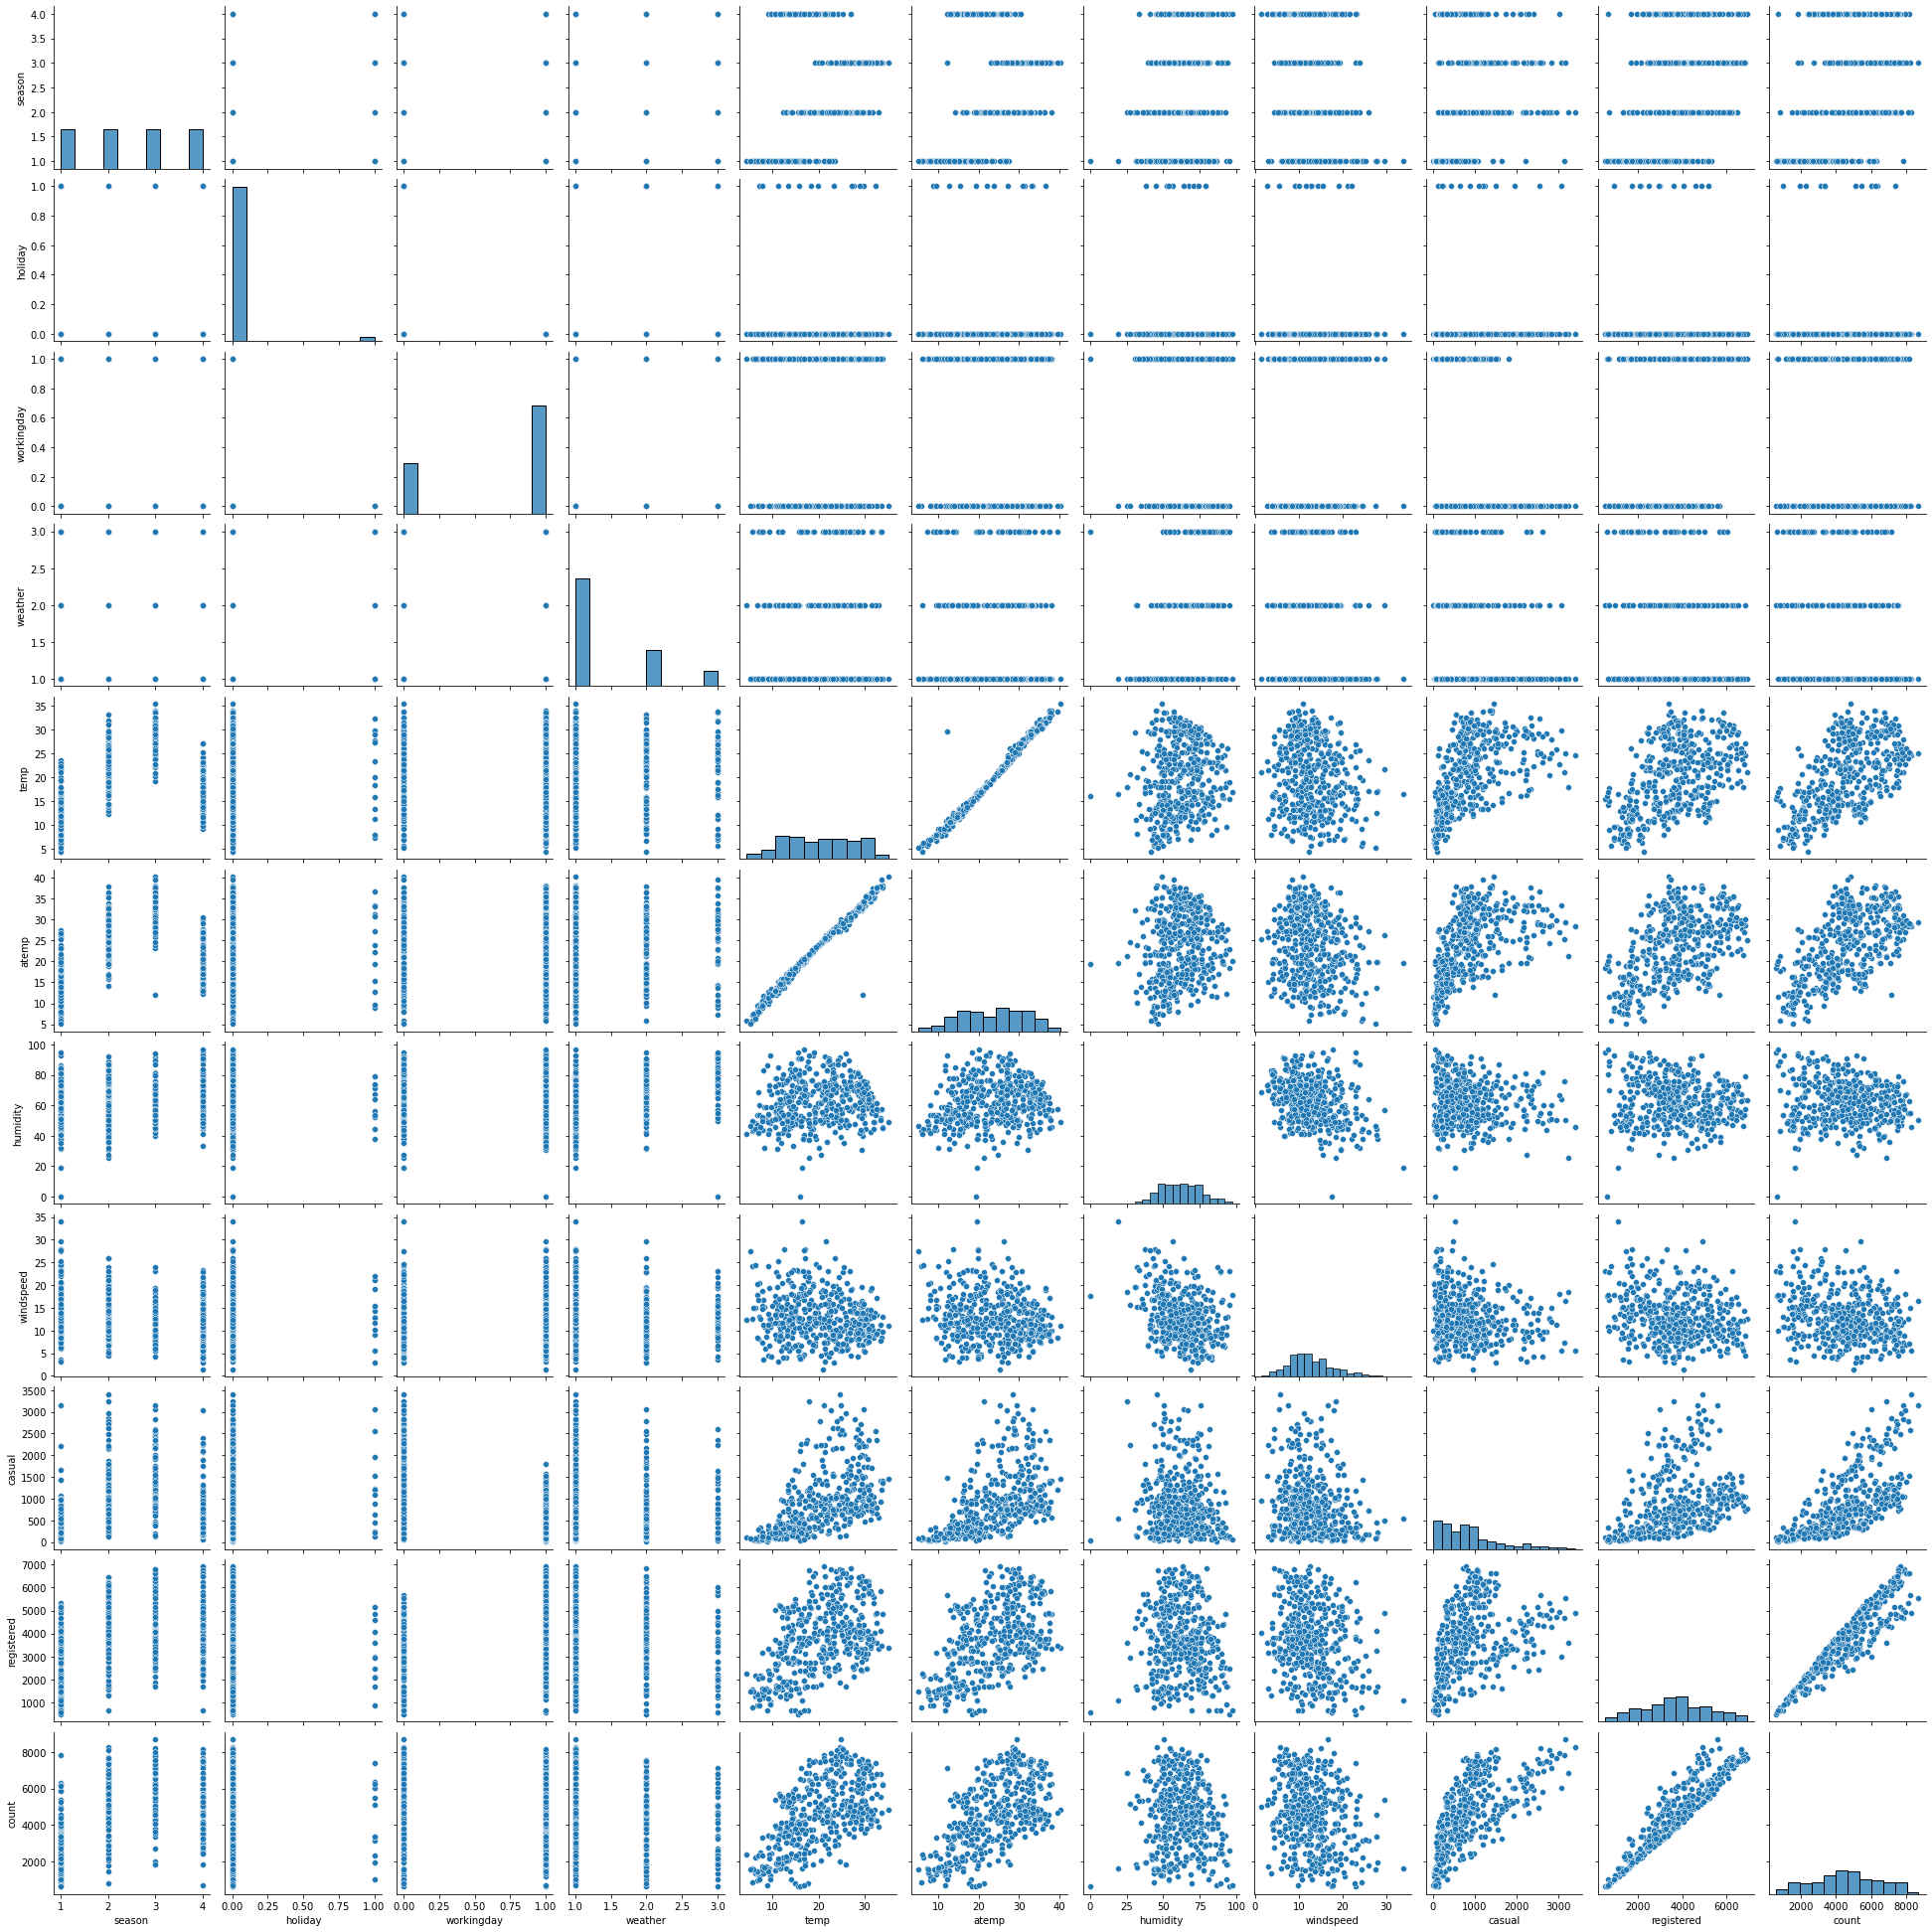

In [22]:
sns.pairplot(df_yulu_daily)

The temperature and real feel ttemperature breakdown by seasons, shows what we would expect. An almost perfect correlation between the measured temperature and the real feel, also observable the seasonal changes.

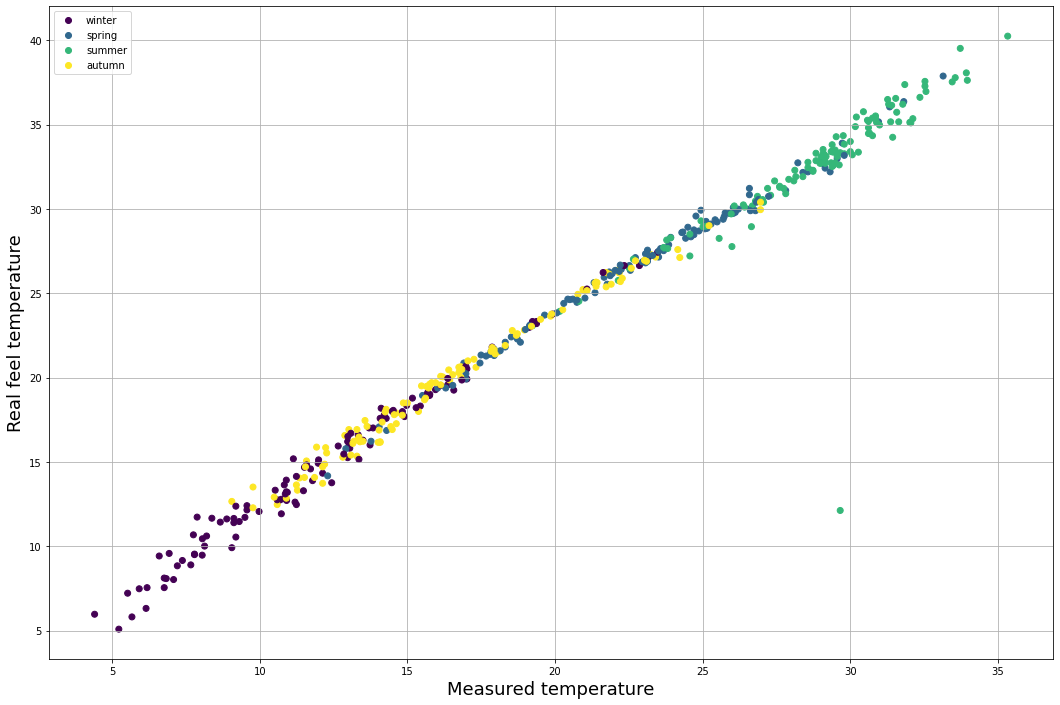

In [23]:
fig = plt.figure(figsize=(18, 12))
text_labels = ['winter', 'spring', 'summer', 'autumn']
plot = plt.scatter(x = df_yulu_daily['temp'], y = df_yulu_daily['atemp'], c = df_yulu_daily['season'])
plt.xlabel('Measured temperature', fontsize = 18)
plt.ylabel('Real feel temperature', fontsize = 18)
plt.legend(plot.legend_elements()[0], text_labels)
plt.grid()

The distribution of the four weather related variables.

Text(0.5, 1.0, 'Humidity distribution')

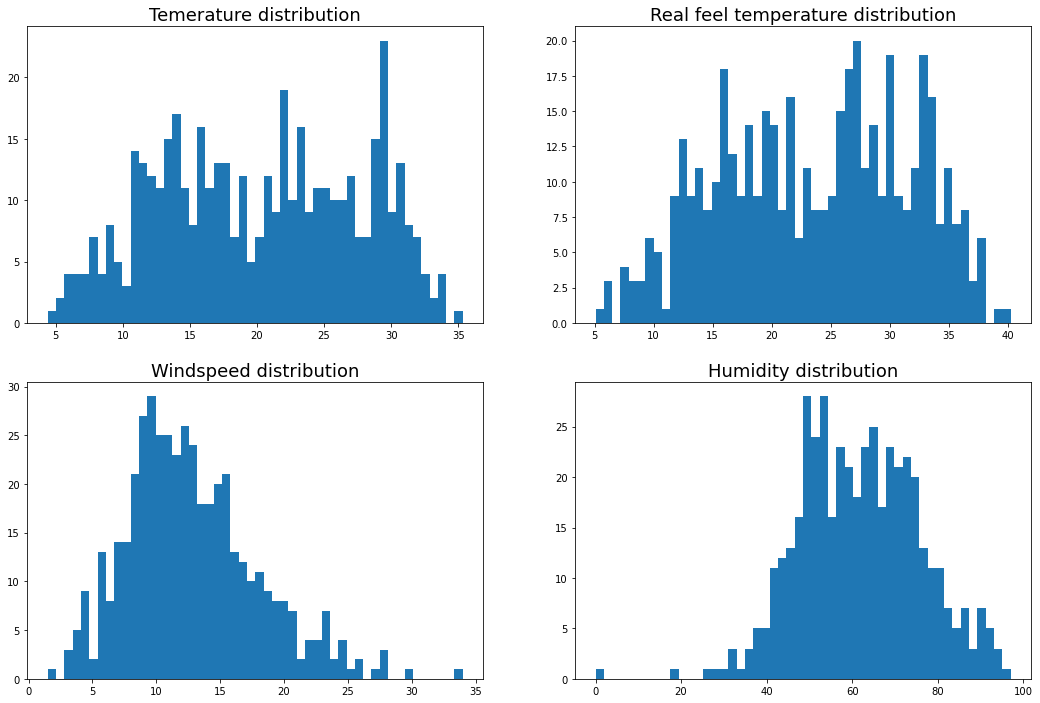

In [24]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize=(18, 12))
ax1.hist(df_yulu_daily['temp'], bins = 50)
ax2.hist(df_yulu_daily['atemp'], bins = 50)
ax3.hist(df_yulu_daily['windspeed'], bins = 50)
ax4.hist(df_yulu_daily['humidity'], bins = 50)
ax1.set_title('Temerature distribution', fontsize = 18)
ax2.set_title('Real feel temperature distribution', fontsize = 18)
ax3.set_title('Windspeed distribution', fontsize = 18)
ax4.set_title('Humidity distribution', fontsize = 18)

Shown below the time series for the four weather observations.

Text(0.5, 1.0, 'Real feel temperature Time Series')

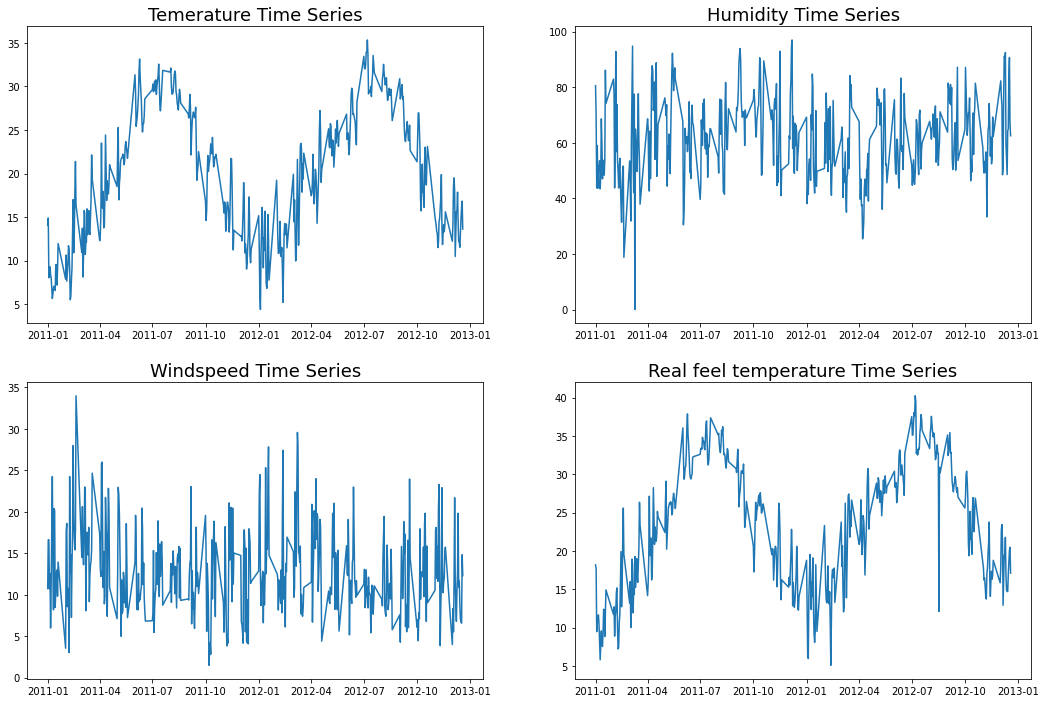

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (18,12))
ax1.plot(df_yulu_daily.index, df_yulu_daily['temp'])
ax2.plot(df_yulu_daily.index, df_yulu_daily['humidity'])
ax3.plot(df_yulu_daily.index, df_yulu_daily['windspeed'])
ax4.plot(df_yulu_daily.index, df_yulu_daily['atemp'])
ax1.set_title('Temerature Time Series', fontsize = 18)
ax2.set_title('Humidity Time Series', fontsize = 18)
ax3.set_title('Windspeed Time Series', fontsize = 18)
ax4.set_title('Real feel temperature Time Series', fontsize = 18)

In [ ]:
'''
def plot_df(data, x, y, title='',):
    plt.figure(figsize=(18,12))
    plt.plot(x, y, color = 'red')
    plt.gca().set(title=title, xlabel='Time period', ylabel='Temperature in C')
    plt.show()
    
plot_df(df_yulu_daily, x = df_yulu_daily.index,  y = df_yulu_daily['temp'],
        title = 'Temperature fluctuations through the recorded period'
        )        
'''

The registered and casual users in the different seasons.

<function matplotlib.pyplot.show(close=None, block=None)>

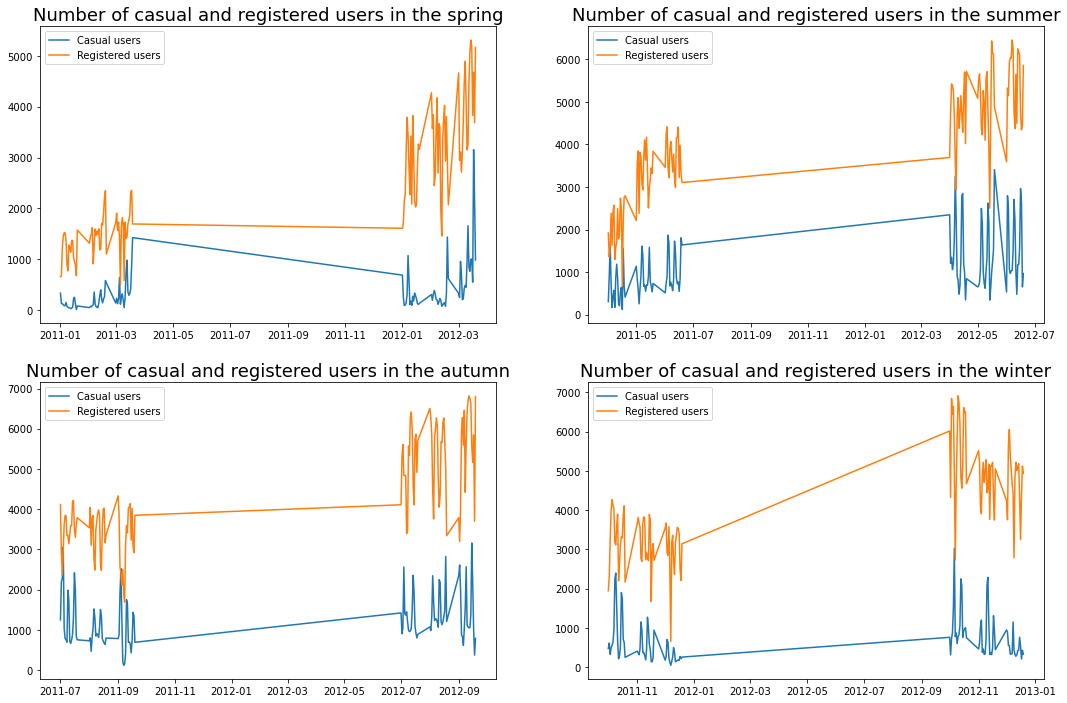

In [26]:
user_casual_spring = df_yulu_daily.loc[(df_yulu_daily['season'] == 1)]
user_casual_summer = df_yulu_daily.loc[(df_yulu_daily['season'] == 2)]
user_casual_autumn = df_yulu_daily.loc[(df_yulu_daily['season'] == 3)]
user_casual_winter = df_yulu_daily.loc[(df_yulu_daily['season'] == 4)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (18,12))

ax1.plot(user_casual_spring.index, user_casual_spring['casual'], label = 'Casual users')
ax2.plot(user_casual_summer.index, user_casual_summer['casual'], label = 'Casual users')
ax3.plot(user_casual_autumn.index, user_casual_autumn['casual'], label = 'Casual users')
ax4.plot(user_casual_winter.index, user_casual_winter['casual'], label = 'Casual users')
ax1.plot(user_casual_spring.index, user_casual_spring['registered'], label = 'Registered users')
ax2.plot(user_casual_summer.index, user_casual_summer['registered'], label = 'Registered users')
ax3.plot(user_casual_autumn.index, user_casual_autumn['registered'], label = 'Registered users')
ax4.plot(user_casual_winter.index, user_casual_winter['registered'], label = 'Registered users')
ax1.set_title('Number of casual and registered users in the spring', fontsize = 18)
ax2.set_title('Number of casual and registered users in the summer', fontsize = 18)
ax3.set_title('Number of casual and registered users in the autumn', fontsize = 18)
ax4.set_title('Number of casual and registered users in the winter', fontsize = 18)
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

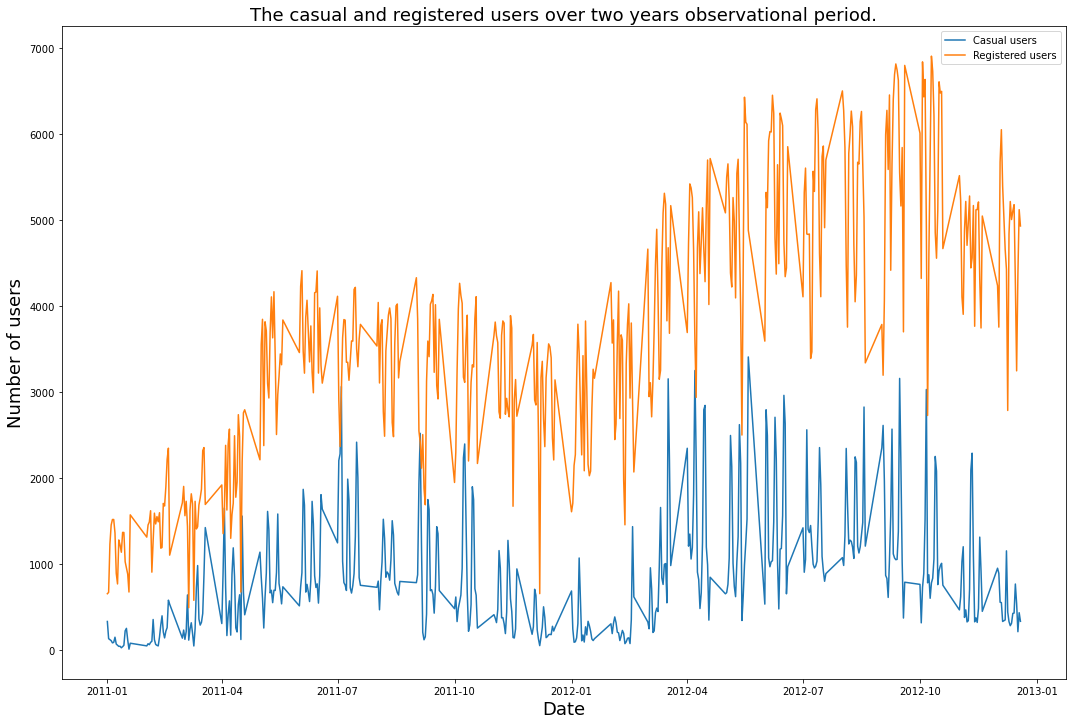

In [23]:
plt.figure(figsize=(18,12))
plt.plot(df_yulu_daily.index, df_yulu_daily['casual'], label = 'Casual users')
plt.plot(df_yulu_daily.index, df_yulu_daily['registered'], label = 'Registered users')
plt.title('The casual and registered users over two years observational period.', fontsize = 18)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Number of users', fontsize = 18)
plt.legend()
plt.show

In [36]:
list = ['temp', 'atemp', 'windspeed', 'humidity']
for i in list:   
    stat, p = shapiro(df_yulu_daily[i])
    print(i + ': stat=%.3f, p=%.3f' % (stat, p) + ' using Shapiro-Wilk test')

    stat, p = normaltest(df_yulu_daily[i])
    print(i + ': stat=%.3f, p=%.3f' % (stat, p) + " using D'Agistino test")

temp: stat=0.968, p=0.000 using Shapiro-Wilk test
temp: stat=140.367, p=0.000 using D'Agistino test
atemp: stat=0.974, p=0.000 using Shapiro-Wilk test
atemp: stat=79.611, p=0.000 using D'Agistino test
windspeed: stat=0.972, p=0.000 using Shapiro-Wilk test
windspeed: stat=37.051, p=0.000 using D'Agistino test
humidity: stat=0.991, p=0.009 using Shapiro-Wilk test
humidity: stat=1.820, p=0.403 using D'Agistino test


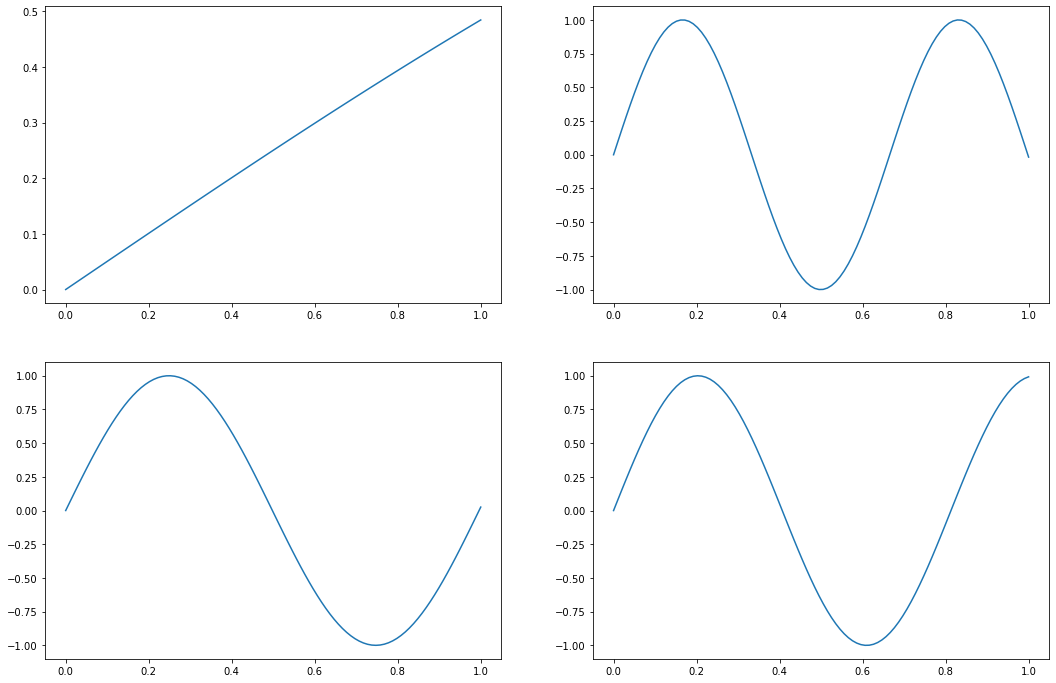

In [221]:
t = np.linspace(0, 1, 100)
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (18,12))
for i in range(2):
    for j in range(2):
        axes[i,j].plot(t, np.sin((t * np.random.random() * 10)))
